In [1]:
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

import urllib.request, time, os

import numpy as np

In [2]:
def ts(x):
    time.sleep(x)

## 1. 

In [97]:
# 서울시 구 리스트
gu_list = '강남구 강동구 강북구 강서구 관악구 광진구 구로구 금천구 노원구 도봉구 동대문구 동작구 마포구 서대문구 서초구 성동구 성북구 송파구 양천구 영등포구 용산구 은평구 종로구 중구 중랑구'.split(' ')

# 빈 리스트 생성
res_name_list = []
res_cate_list = []
res_score_list = []
res_review_cnt_list = []
res_blog_cnt_list = []
res_address_list = []
res_facility_list = []
res_broad_list = []

In [18]:
# 드라이버 실행
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install())); ts(5)

In [18]:
# 구 하나씩 입력하여 검색
for gu in tqdm(gu_list):
    
    # 네이버
    driver.get('https://www.naver.com'); ts(3)
    
    
    driver.find_element(By.ID, 'query').send_keys('관악구 돈가스' + '\n'); ts(3)
    driver.find_element(By.XPATH, '//*[@id="place-main-section-root"]/section/div/div[6]/a').click()
    driver.switch_to.window(driver.window_handles[1])

25

In [29]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install())); ts(2)
driver.get('https://www.naver.com'); ts(2)


driver.find_element(By.ID, 'query').send_keys('서울시 관악구 돈가스' + '\n'); ts(3)
driver.find_element(By.XPATH, '//*[@id="place-main-section-root"]/section/div/div[6]/a').click()
driver.switch_to.window(driver.window_handles[1])


# iframe 안으로 들어가기
driver.switch_to.frame('searchIframe')

# iframe 안쪽을 한번 클릭하기
driver.find_element(By.ID, '_pcmap_list_scroll_container').click()

# 로딩된 데이터 개수 확인
res = driver.find_elements(By.CSS_SELECTOR, '#_pcmap_list_scroll_container > ul > li')
before_len = len(res)

# 페이지 아래로 내리기
while True:
    # 맨 아래로 스크롤 내린다.
    driver.find_element(By.CSS_SELECTOR, 'body').send_keys(Keys.END)

    # 스크롤 사이 페이지 로딩 시간
    ts(2)

    # 스크롤 후 로딩된 데이터 개수 확인
    res = driver.find_elements(By.CSS_SELECTOR, '#_pcmap_list_scroll_container > ul > li')
    after_len = len(res); ts(2)

    # 로딩된 데이터 개수가 같다면 반복 멈춤
    if before_len == after_len:
        ts(2)
        break
    before_len = after_len

# afterlen

for i in range(after_len):
    ts(2)
    # 음식점부터 클릭
    driver.find_element(By.CSS_SELECTOR, f'#_pcmap_list_scroll_container > ul > li:nth-child({i+1})').click()
    ts(2)

    # iFrame에서 빠져나가 기본 콘텐츠로 돌아가기
    driver.switch_to.default_content();ts(2)
    
    # iframe 전환하기
    driver.switch_to.frame('entryIframe'); ts(2) # 상세정보
    
    # iframe 안쪽을 한번 클릭하기
    # driver.find_element(By.ID, '//*[@id="app-root"]/div/div/div').click()
    
    # 홈 버튼 클릭 
    driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[5]/div/div/div/div/a[1]/span').click()
    ts(2)
    
    # 크롤링 시작!
    # 이름
    try:
        res_name = driver.find_element(By.CSS_SELECTOR, '#_title > span.Fc1rA').text
        res_name_list.append(res_name)
    except:
        res_name_list.append(np.nan)
    
    
    # 카테고리
    try:
        res_cate = driver.find_element(By.XPATH, '//*[@id="_title"]/span[2]').text
        res_cate_list.append(res_cate)
    except:
        res_cate_list.append(np.nan)
    
    
    # 별점
    try:
        res_score = driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[2]/div[1]/div[2]/span[1]/em').text
        res_score_list.append(res_score)
    except:
        res_score_list.append(np.nan)
        
        
    # 리뷰 수
    try:
        res_review_cnt = driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[2]/div[1]/div[2]/span[2]/a/em').text
        res_review_cnt_list.append(res_review_cnt)
    except:
        res_review_cnt_list.append(np.nan)
        
    
    # 블로그 글 수
    try:
        res_blog_cnt = driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[2]/div[1]/div[2]/span[3]/a/em').text
        res_blog_cnt_list.append(res_blog_cnt)
    except:
        res_blog_cnt_list.append(np.nan)
    
    
    # 주소
    try:
        driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[6]/div/div[2]/div/div/div[1]/div/a/span[1]').click()
        res_address = driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[6]/div/div[2]/div/div/div[1]/div/div[1]/div[1]').text
        res_address_list.append(res_address)
    except:
        res_address_list.append(np.nan)
        
    
    # 편의
    try:
        res_facility = driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[6]/div/div[2]/div/div/div[6]').text 
        res_facility_list.append(res_facility)
    except:
        res_facility_list.append(np.nan)

        
    # 방송
    try:
        driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[6]/div/div[2]/div/div/div[7]/div/a/div[1]/div/span[1]').click()
        res_broad = driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[6]/div/div[2]/div/div/div[7]').text
    except:
        res_broad_list.append(np.nan)
    
    # iFrame에서 빠져나가 기본 콘텐츠로 돌아가기
    driver.switch_to.default_content(); ts(2)
    
    # iframe 안으로 들어가기
    driver.switch_to.frame('searchIframe'); ts(2)
    
    # 소개글
    # driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[7]/div/div[2]/div/div/div[9]/div/a/span[1]').click()
    # res_info = driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[7]/div/div[2]/div/div/div[9]/div/a/span[1]').text

NoSuchFrameException: Message: entryIframe


In [23]:
res_name_list

['킷사서울',
 '킷사서울',
 '킷사서울',
 '킷사서울',
 '모리라멘&돈카츠',
 '킷사서울',
 '킷사서울',
 '모리라멘&돈카츠',
 '킷사서울',
 '킷사서울',
 '모리라멘&돈카츠']

In [20]:
print(res_name)
print(res_cate)
print(res_score)
print(res_review_cnt)
print(res_blog_cnt)
print(res_address)
print(res_facility)
print(res_broad)
# print(res_info)



모리라멘&돈카츠
일식당
4.62
1,977
433
도로명서울 관악구 남부순환로226길 31 2층 킷사서울복사
편의
단체석, 무선 인터넷
TV방송정보
줄서는식당 43회, 22.11.28.
2022년 11월 28일
 두툼달걀샌드위치/새우연어장덮밥/매콤소고기전골/오믈렛볶음면
생방송투데이 2709회, 20.12.01.
2020년 12월 1일
 해물덮밥/꽃돼지덮밥
접기


In [17]:
driver.close(); ts(1)
driver.switch_to.window(driver.window_handles[0])
driver.close()
driver.quit()

In [27]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install())); ts(2)
driver.get('https://www.naver.com'); ts(2)


driver.find_element(By.ID, 'query').send_keys('서울시 관악구 돈가스' + '\n'); ts(2)
driver.find_element(By.XPATH, '//*[@id="place-main-section-root"]/section/div/div[6]/a').click(); ts(2)
driver.switch_to.window(driver.window_handles[1])


# iframe 안으로 들어가기
driver.switch_to.frame('searchIframe'); ts(2)

# iframe 안쪽을 한번 클릭하기
driver.find_element(By.CSS_SELECTOR, '#app-root > div > div.XUrfU').click(); ts(2)

# 로딩된 데이터 개수 확인
res = driver.find_elements(By.CSS_SELECTOR, '#_pcmap_list_scroll_container > ul > li')
before_len = len(res)

# 페이지 아래로 내리기
while True:
    # 맨 아래로 스크롤 내린다.
    driver.find_element(By.CSS_SELECTOR, 'body').send_keys(Keys.END)

    # 스크롤 사이 페이지 로딩 시간
    ts(2)

    # 스크롤 후 로딩된 데이터 개수 확인
    res = driver.find_elements(By.CSS_SELECTOR, '#_pcmap_list_scroll_container > ul > li')
    after_len = len(res); ts(2)

    # 로딩된 데이터 개수가 같다면 반복 멈춤
    if before_len == after_len:
        ts(2)
        break
    before_len = after_len

html = driver.page_source
soup = bs(html, 'html.parser')

res_list = soup.find_all('div', class_='_3ZU00 _1O7ex')

print(res_list)

# # 음식점부터 클릭
# driver.find_element(By.CSS_SELECTOR, '#_pcmap_list_scroll_container > ul > li:nth-child(1)').click()
# ts(2)

# driver.find_element(By.CSS_SELECTOR, '#_pcmap_list_scroll_container > ul > li:nth-child(2)').click()
# ts(2)
#         # iFrame에서 빠져나가 기본 콘텐츠로 돌아가기
#         driver.switch_to.default_content();ts(2)

#         # # iframe 전환하기
#         # driver.switch_to.frame('entryIframe'); ts(2) # 상세정보

#         # iframe 안쪽을 한번 클릭하기
#         # driver.find_element(By.ID, '//*[@id="app-root"]/div/div/div').click()

#         # 홈 버튼 클릭 
#         driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[5]/div/div/div/div/a[1]/span').click()
#         ts(2)
        
#         # iFrame에서 빠져나가 기본 콘텐츠로 돌아가기
#         driver.switch_to.default_content();ts(2)
        
#         # 닫기 버튼 클릭
#         driver.find_element(By.CSS_SELECTOR, '#container > shrinkable-layout > div > app-base > search-layout > div.sub.ng-star-inserted > entry-layout > entry-close-button > button').click()
        
#         # iframe 안으로 들어가기
#         driver.switch_to.frame('searchIframe')

#         # # iframe 안쪽을 한번 클릭하기
#         # driver.find_element(By.ID, '_pcmap_list_scroll_container').click()
        
        

[]


In [22]:
# iFrame에서 빠져나가 기본 콘텐츠로 돌아가기
driver.switch_to.default_content();ts(2)
iframe = driver.find_elements(By.TAG_NAME, 'iframe')

In [23]:
iframe

[<selenium.webdriver.remote.webelement.WebElement (session="f481b32a593696e40a4fa30db4fa24ea", element="ABB3CBED9F2BB901D68A76A75BEE1F70_element_245")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f481b32a593696e40a4fa30db4fa24ea", element="ABB3CBED9F2BB901D68A76A75BEE1F70_element_246")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f481b32a593696e40a4fa30db4fa24ea", element="ABB3CBED9F2BB901D68A76A75BEE1F70_element_247")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f481b32a593696e40a4fa30db4fa24ea", element="ABB3CBED9F2BB901D68A76A75BEE1F70_element_248")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f481b32a593696e40a4fa30db4fa24ea", element="ABB3CBED9F2BB901D68A76A75BEE1F70_element_47")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f481b32a593696e40a4fa30db4fa24ea", element="ABB3CBED9F2BB901D68A76A75BEE1F70_element_84")>]

In [133]:
driver.close(); ts(1)
driver.switch_to.window(driver.window_handles[0])
driver.close()
driver.quit()

[<div class="_place_style_loader">
 <style data-isomorphic-style="true" id="944284" type="text/css">@font-face{font-family:"NanumSquareR";src:local("NanumSquareR"),url("https://hangeul.pstatic.net/hangeul_static/webfont/NanumSquare/NanumSquareR.eot"),url("https://hangeul.pstatic.net/hangeul_static/webfont/NanumSquare/NanumSquareR.eot?#iefix") format("embedded-opentype"),url("https://hangeul.pstatic.net/hangeul_static/webfont/NanumSquare/NanumSquareR.woff") format("woff"),url("https://hangeul.pstatic.net/hangeul_static/webfont/NanumSquare/NanumSquareR.ttf") format("truetype");font-display:swap}@font-face{font-family:"NanumSquareL";src:local("NanumSquareL"),url("https://hangeul.pstatic.net/hangeul_static/webfont/NanumSquare/NanumSquareL.eot"),url("https://hangeul.pstatic.net/hangeul_static/webfont/NanumSquare/NanumSquareL.eot?#iefix") format("embedded-opentype"),url("https://hangeul.pstatic.net/hangeul_static/webfont/NanumSquare/NanumSquareL.woff") format("woff"),url("https://hangeul.pst
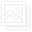
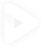
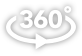
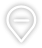

In [33]:
soup.find_all('div')

In [ ]:
place_bluelink TYaxT

In [35]:
soup.find_all('div', class_="place_bluelink TYaxT")

[]

## 여기!!

In [134]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install())); ts(2)
driver.get('https://www.naver.com'); ts(2)


driver.find_element(By.ID, 'query').send_keys('서울시 관악구 돈가스' + '\n'); ts(2)
driver.find_element(By.XPATH, '//*[@id="place-main-section-root"]/section/div/div[6]/a').click(); ts(2)
driver.switch_to.window(driver.window_handles[1])


# iframe 안으로 들어가기
driver.switch_to.frame('searchIframe'); ts(2)

In [135]:
# iframe 안쪽을 한번 클릭하기
driver.find_element(By.CSS_SELECTOR, '#app-root > div > div.XUrfU').click(); ts(2)

# 로딩된 데이터 개수 확인
res = driver.find_elements(By.CSS_SELECTOR, '#_pcmap_list_scroll_container > ul > li')
before_len = len(res)

# 페이지 아래로 내리기
while True:
    # 맨 아래로 스크롤 내린다.
    driver.find_element(By.CSS_SELECTOR, 'body').send_keys(Keys.END)

    # 스크롤 사이 페이지 로딩 시간
    ts(2)

    # 스크롤 후 로딩된 데이터 개수 확인
    res = driver.find_elements(By.CSS_SELECTOR, '#_pcmap_list_scroll_container > ul > li')
    after_len = len(res); ts(2)

    # 로딩된 데이터 개수가 같다면 반복 멈춤
    if before_len == after_len:
        ts(2)
        break
    before_len = after_len

In [142]:
# iFrame에서 빠져나가 기본 콘텐츠로 돌아가기
driver.switch_to.default_content();ts(1)
        
# 닫기 버튼 클릭
driver.find_element(By.XPATH, '//*[@id="container"]/shrinkable-layout/div/app-base/search-layout/div/entry-layout/entry-close-button/button').click()

# iframe 안으로 들어가기
driver.switch_to.frame('searchIframe'); ts(2)

# 빈 리스트 생성
res_name_list = []
res_cate_list = []
res_score_list = []
res_review_cnt_list = []
res_blog_cnt_list = []
res_address_list = []
res_facility_list = []
res_broad_list = []

for i in range(1, after_len+1):
    driver.find_element(By.XPATH, '//*[@id="_pcmap_list_scroll_container"]/ul/li[{}]/div[1]/a[1]/div/div/span[1]'.format(i)).click()
    
    # 암시적 대기
    driver.implicitly_wait(3)
    
    # iFrame에서 빠져나가 기본 콘텐츠로 돌아가기
    driver.switch_to.default_content()
    
    # iframe 전환하기
    driver.switch_to.frame('entryIframe'); ts(2) # 상세정보
    
    # 홈 클릭
    driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[5]/div/div/div/div/a[1]/span').click()
    
    # 암시적 대기
    driver.implicitly_wait(1)
    
    # 크롤링 시작!!!
    # 이름
    try:
        res_name = driver.find_element(By.XPATH, '//*[@id="_title"]/span[1]').text
        res_name_list.append(res_name)
    except:
        res_name_list.append(np.nan)
        
    
    
    # iFrame 변경
    driver.switch_to.default_content()
    driver.switch_to.frame('searchIframe'); ts(2)
    
# a1 = driver.find_elements(By.CSS_SELECTOR, '#_pcmap_list_scroll_container > ul > li:nth-child > div.CHC5F > a.tzwk0 > div > div > span.place_bluelink.TYaxT')
# a2 = driver.find_elements(By.XPATH, '//*[@id="_pcmap_list_scroll_container"]/ul/li[1]/div[1]/a[1]/div/div/span')




In [144]:
res_name_list, len(res_name_list)

(['킷사서울',
  '온정돈까스 본점',
  '모리라멘&돈카츠',
  '봉이돈가스',
  '앤미',
  '카츠오도 신대방본점',
  '이응가츠',
  '금제',
  '가츠가게 서울대점',
  '연소바서울대점',
  '30cm 수제 킹 돈까스 신림본점',
  '도쿄커틀릿 샤로수길점',
  '카츠오도 낙성대점',
  'KATSU97',
  '만푸쿠 본점',
  '별미분식',
  '제남메밀',
  '대가왕돈카츠',
  '안녕쿠마',
  '신호등장작구이',
  '화평동냉면 왕돈가스',
  '동백카츠 샤로수길점',
  '올래돈까스',
  '백소정 신림점',
  '왕냉면왕돈가스 낙성대점',
  '코시롱',
  '건강안식사 신림점',
  '빨강떡볶이',
  '석양식당',
  '삼백돈 돈가츠 본점',
  '다케',
  '모리돈부리 서울대입구역점',
  '미친키친',
  '본동소바',
  '진우리참치',
  '라밥 서울대입구역점',
  '초이다이닝 샤로수길점',
  '새로오픈',
  '라밥 낙성대점',
  '수유 다래함박스텍',
  '길회센터',
  '왕세숫대야냉면왕돈까스 서울대점',
  '손가네 수제돈까스',
  '라밥 신대방2호점',
  '오른손푸드카페',
  '마뇨떡볶이',
  '예가돈까스',
  '삿뽀로 롯데백화점 관악점',
  '롤앤밥스',
  '박리분식'],
 50)

In [ ]:
a1 = driver.find_elements(By.XPATH, '//*[@id="_pcmap_list_scroll_container"]/ul/li/div[1]/a[1]/div/div/span[1]')
len(a1)

In [94]:
a1[2].text

'모리라멘&돈카츠'

In [62]:
a2[0].text

'킷사서울'

In [107]:
driver.find_element(By.LINK_TEXT, '연소바서울대점').click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"link text","selector":"연소바서울대점"}
  (Session info: chrome=115.0.5790.171); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
Backtrace:
	GetHandleVerifier [0x007A2B63+47795]
	(No symbol) [0x007367E1]
	(No symbol) [0x0063C7ED]
	(No symbol) [0x00669AC8]
	(No symbol) [0x00669B8B]
	(No symbol) [0x00698A82]
	(No symbol) [0x00684D14]
	(No symbol) [0x006971DA]
	(No symbol) [0x00684AC6]
	(No symbol) [0x006613D7]
	(No symbol) [0x0066255D]
	GetHandleVerifier [0x009F6F89+2490073]
	GetHandleVerifier [0x00A3C361+2773681]
	GetHandleVerifier [0x00A36211+2748769]
	GetHandleVerifier [0x008216B0+566784]
	(No symbol) [0x0074019A]
	(No symbol) [0x0073C418]
	(No symbol) [0x0073C4FB]
	(No symbol) [0x0072F317]
	BaseThreadInitThunk [0x764600C9+25]
	RtlGetAppContainerNamedObjectPath [0x77B87B1E+286]
	RtlGetAppContainerNamedObjectPath [0x77B87AEE+238]


In [96]:
# iFrame에서 빠져나가 기본 콘텐츠로 돌아가기
driver.switch_to.default_content();ts(1)

# iframe 전환하기
driver.switch_to.frame('entryIframe'); ts(1) # 상세정보

driver.find_element(By.LINK_TEXT, '홈').click()

In [98]:
# 이름
try:
    res_name = driver.find_element(By.CSS_SELECTOR, '#_title > span.Fc1rA').text
    res_name_list.append(res_name)
except:
    res_name_list.append(np.nan)

In [100]:
res_name_list

['앤미']

In [48]:
# iframe 안으로 들어가기
driver.switch_to.frame('searchIframe'); ts(2)

# 음식점부터 클릭
driver.find_element(By.CSS_SELECTOR, '#_pcmap_list_scroll_container > ul > li:nth-child(2)').click()
ts(2)

# iFrame에서 빠져나가 기본 콘텐츠로 돌아가기
driver.switch_to.default_content();ts(1)

# iframe 전환하기
driver.switch_to.frame('entryIframe'); ts(2) # 상세정보

# 홈 버튼 클릭 
driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[5]/div/div/div/div/a[1]/span').click()
ts(2)

NoSuchFrameException: Message: entryIframe
